# Monthly Beer Production - Time Series Analysis

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

## Loading dataset

In [3]:
df = pd.read_csv('monthly-beer-production.csv')
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


## Exploring data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [5]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [6]:
df.index

DatetimeIndex(['1956-01-01', '1956-02-01', '1956-03-01', '1956-04-01',
               '1956-05-01', '1956-06-01', '1956-07-01', '1956-08-01',
               '1956-09-01', '1956-10-01',
               ...
               '1994-11-01', '1994-12-01', '1995-01-01', '1995-02-01',
               '1995-03-01', '1995-04-01', '1995-05-01', '1995-06-01',
               '1995-07-01', '1995-08-01'],
              dtype='datetime64[ns]', name='Month', length=476, freq=None)

In [7]:
df.index.freq = 'MS' # monthly (month start)

## Data Visualization

#### Seasonality

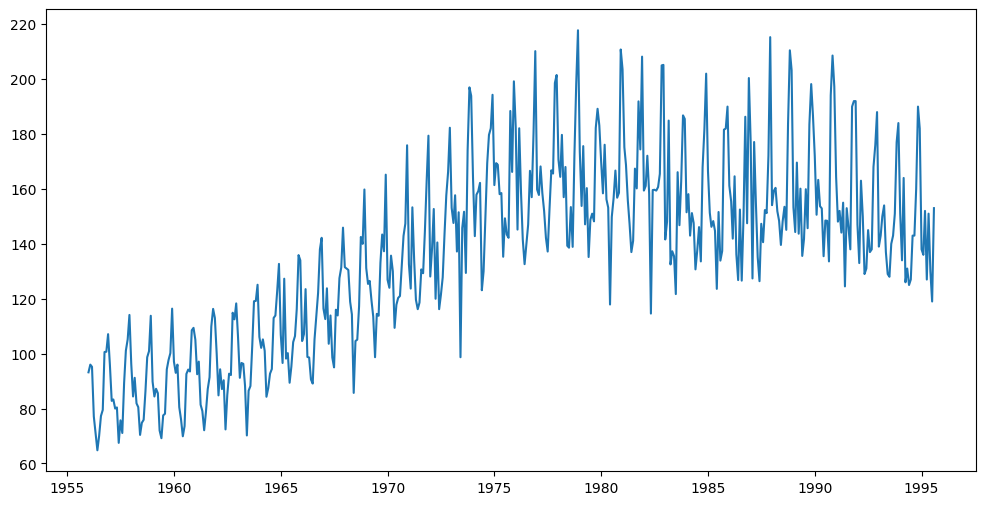

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Monthly beer production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

#### Seasonal Decompose

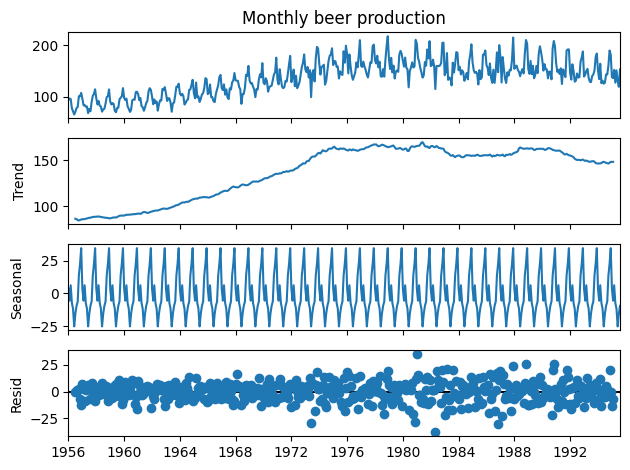

In [9]:
a = seasonal_decompose(df["Monthly beer production"], model = "add")
a.plot();

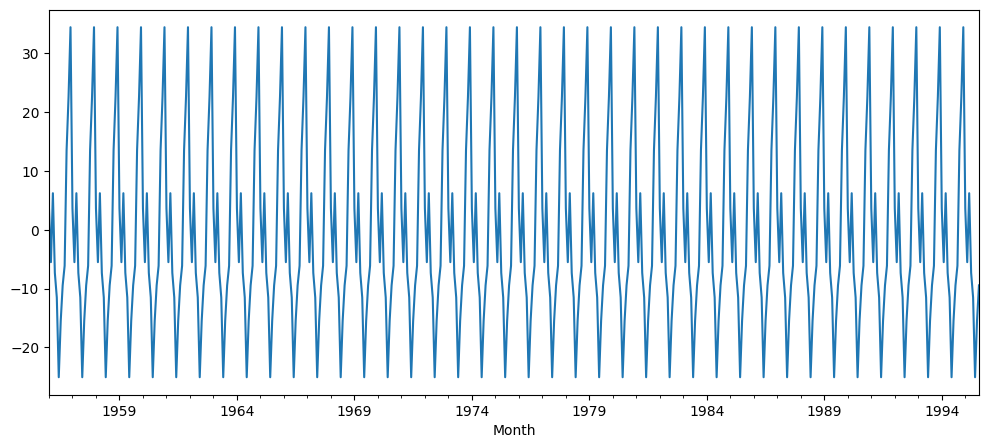

In [10]:
plt.figure(figsize = (12,5))
a.seasonal.plot();

## SARIMA Forecast

In [11]:
# Out of time testing
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [12]:
arima_model = SARIMAX(train_data['Monthly beer production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1707.868
Date:                                    Wed, 31 Jul 2024   AIC                           3437.737
Time:                                            15:27:52   BIC                           3483.252
Sample:                                        01-01-1956   HQIC                          3455.655
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1214      0.042     -2.922      0.003      -0.203      -0.040
ar.L2         -0.1793      0.044     -4.065      0.000      -0.266      -0.093
ma.L1         -0.8409      0.028    -30.138      0.000      -0.896      -0.786
ar.S.L12       1.7515      0.107     16.359      0.000       1.542       1.961
ar.S.L24      -1.6051      0.210     -7.649      0.000      -2.016      -1.194
ar.S.L36       0.7830      0.169      4.644      0.000       0.453       1.113
ar.S.L48       0.0693      0.060      1.152      0.249      -0.049       0.187
ma.S.L12      -1.5602      0.117    -13.297      0.000      -1.790      -1.330
ma.S.L24       1.4064      0.198      7.088      0.000       1.017       1.795
ma.S.L36      -0.6792      0.118     -5.758      0.000      -0.910      -0.448
sigma2        84.8200      5.045     16.812      0.000      74.932      94.708
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                39.40
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               4.03   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

,ARIMA Predictions
1994-09-01,134.458442
1994-10-01,157.224115
1994-11-01,181.382726
1994-12-01,183.886059
1995-01-01,144.589497
1995-02-01,137.186397
1995-03-01,151.482611
1995-04-01,133.447860
1995-05-01,138.078729
1995-06-01,120.790795


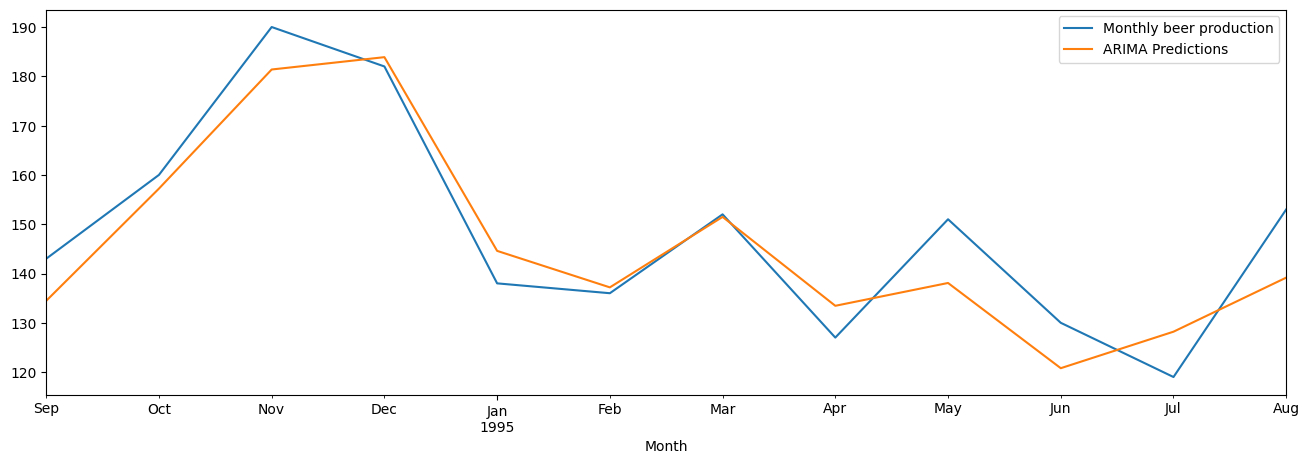

In [14]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [15]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 64.40895564334816
RMSE Error: 8.025519026414937
Mean: 136.3953781512605


## LSTM(RNN) Forecast

In [16]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#### Scaling the dataset

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

#### Creating a Time Series generator

In [19]:
n_input = 12 # sequence length
n_features = 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

#### Creating a LSTM model (type of RNN)

In [20]:
lstm_model = Sequential()

lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

In [21]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161801 (632.04 KB)
Trainable params: 161801 (632.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
lstm_model.fit_generator(generator, epochs=20)

Epoch 1/20
452/452 [==============================] - 8s 14ms/step - loss: 0.0214
Epoch 2/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0127
Epoch 3/20
452/452 [==============================] - 7s 15ms/step - loss: 0.0089
Epoch 4/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0095
Epoch 5/20
452/452 [==============================] - 5s 12ms/step - loss: 0.0076
Epoch 6/20
452/452 [==============================] - 6s 14ms/step - loss: 0.0073
Epoch 7/20
452/452 [==============================] - 6s 14ms/step - loss: 0.0079
Epoch 8/20
452/452 [==============================] - 6s 14ms/step - loss: 0.0073
Epoch 9/20
452/452 [==============================] - 5s 12ms/step - loss: 0.0069
Epoch 10/20
452/452 [==============================] - 5s 12ms/step - loss: 0.0072
Epoch 11/20
452/452 [==============================] - 6s 14ms/step - loss: 0.0068
Epoch 12/20
452/452 [==============================] - 7s 15ms/step - loss: 0.0062
Epoch 13/20
4

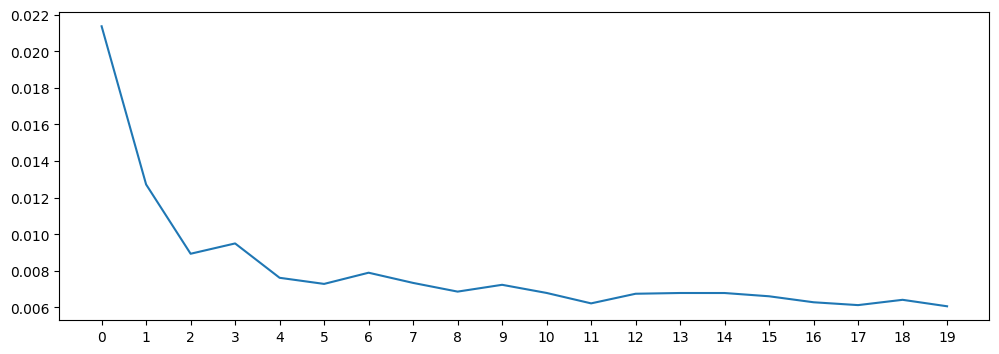

In [23]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)), losses_lstm);

#### Model Prediction

In [24]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [25]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[137.54489102],
       [145.92257051],
       [160.71100609],
       [160.18664335],
       [140.57161556],
       [136.12647425],
       [144.3365417 ],
       [127.24155389],
       [127.57009338],
       [124.91959881],
       [127.30424141],
       [133.49483882]])

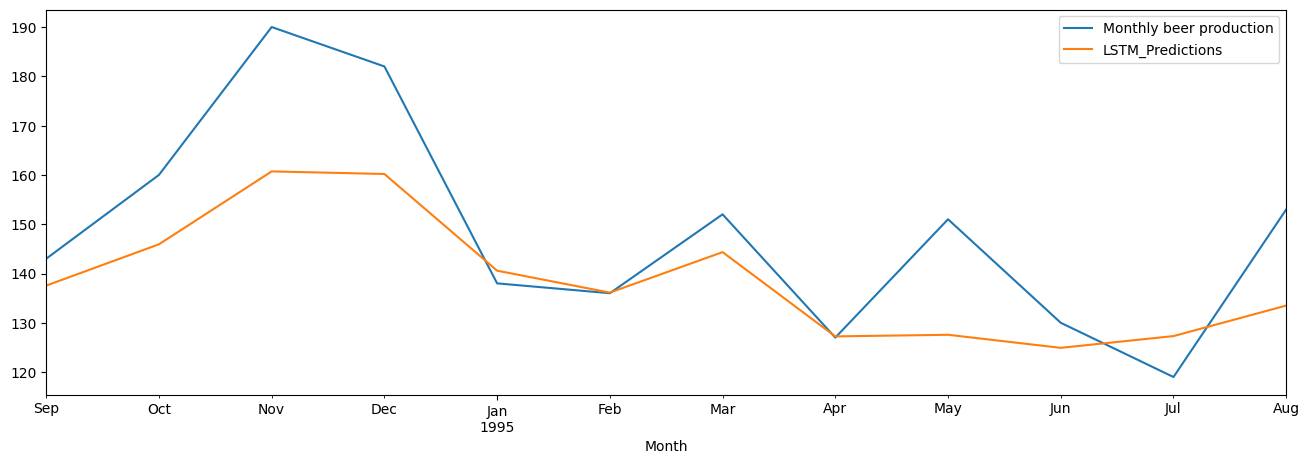

In [26]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [27]:
lstm_rmse_error = rmse(test_data['Monthly beer production'], test_data['LSTM_Predictions'])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 220.933234121636
RMSE Error: 14.863822998193836
Mean: 136.3953781512605


## Prophet Forecast

In [28]:
from prophet import Prophet

#### Preparing Data

In [29]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y']

In [30]:
train_data_pr = df_pr.iloc[ : len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12 : ]

#### Creating Model

In [31]:
m = Prophet()
m.fit(train_data_pr)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_lvad_f8/qd611rq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_lvad_f8/6ngoiqc3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6587', 'data', 'file=/tmp/tmp_lvad_f8/qd611rq3.json', 'init=/tmp/tmp_lvad_f8/6ngoiqc3.json', 'output', 'file=/tmp/tmp_lvad_f8/prophet_modelgicbj7ih/prophet_model-20240731153052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#### Prediction

In [32]:
future = m.make_future_dataframe(periods=12, freq='MS')
prophet_pred = m.predict(future)

In [33]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.144463,130.589129,155.450557,151.092806,151.206398,-7.934808,-7.934808,-7.934808,-7.934808,-7.934808,-7.934808,0.0,0.0,0.0,143.209655
472,1995-05-01,151.080858,126.756562,151.644001,151.003014,151.164964,-11.402758,-11.402758,-11.402758,-11.402758,-11.402758,-11.402758,0.0,0.0,0.0,139.678100
473,1995-06-01,151.015133,114.912565,138.047258,150.913519,151.134547,-23.937802,-23.937802,-23.937802,-23.937802,-23.937802,-23.937802,0.0,0.0,0.0,127.077331
474,1995-07-01,150.951528,123.374640,147.600561,150.829521,151.104268,-15.750348,-15.750348,-15.750348,-15.750348,-15.750348,-15.750348,0.0,0.0,0.0,135.201180
475,1995-08-01,150.885802,128.944547,153.760234,150.739236,151.068620,-9.225823,-9.225823,-9.225823,-9.225823,-9.225823,-9.225823,0.0,0.0,0.0,141.659980


In [34]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
1994-09-01,145.087539
1994-10-01,166.081091
1994-11-01,173.723925
1994-12-01,185.973010
1995-01-01,155.264621
1995-02-01,146.816704
1995-03-01,158.910830
1995-04-01,143.209655
1995-05-01,139.678100


In [35]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

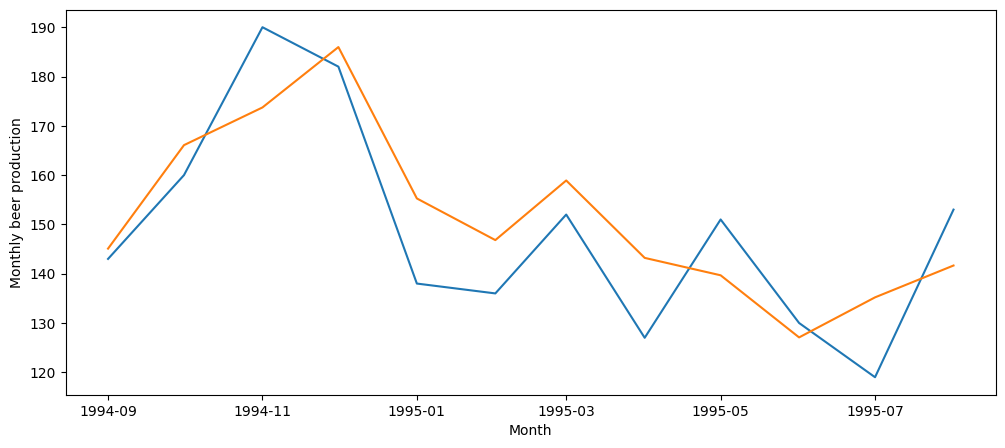

In [36]:
plt.figure(figsize=(12,5))
sns.lineplot(x= test_data.index, y=test_data["Monthly beer production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [37]:
prophet_rmse_error = rmse(test_data['Monthly beer production'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 131.28461306982217
RMSE Error: 11.457949776021108
Mean: 136.3953781512605


## All Models Performance

In [38]:
models = ["ARIMA", "LSTM", "Prophet"]
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]

errors = pd.DataFrame({"Models" : models, "RMSE" : rmse_errors, "MSE" : mse_errors})

In [39]:
errors

,Models,RMSE,MSE
0,ARIMA,8.025519,64.408956
1,LSTM,14.863823,220.933234
2,Prophet,11.457950,131.284613


In [40]:
test_data['ARIMA_Predictions'] = arima_pred

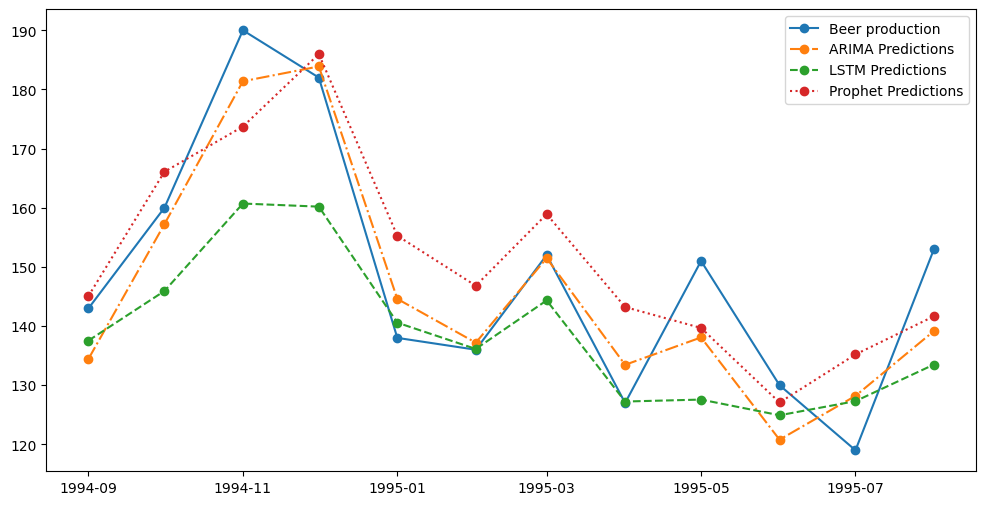

In [41]:
plt.figure(figsize=(12, 6))
plt.plot_date(test_data.index, test_data["Monthly beer production"], linestyle="-", label='Beer production')
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.", label='ARIMA Predictions')
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--", label='LSTM Predictions')
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":", label='Prophet Predictions')
plt.legend()
plt.show()

In [42]:
test_data

,Monthly beer production,LSTM_Predictions,Prophet_Predictions,ARIMA_Predictions
Month,,,,
1994-09-01,143.0,137.544891,145.087539,134.458442
1994-10-01,160.0,145.922571,166.081091,157.224115
1994-11-01,190.0,160.711006,173.723925,181.382726
1994-12-01,182.0,160.186643,185.973010,183.886059
1995-01-01,138.0,140.571616,155.264621,144.589497
1995-02-01,136.0,136.126474,146.816704,137.186397
1995-03-01,152.0,144.336542,158.910830,151.482611
1995-04-01,127.0,127.241554,143.209655,133.447860
1995-05-01,151.0,127.570093,139.678100,138.078729
